

# Strategy-wise analysis

## Averages across each run per participating team over acceleration, skidpad and autocross events

Importing dependencies and setting up matplotlib plot style

In [161]:
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib import ticker
import csv

plt.style.use("ggplot")

### Aceleration event

Loading teams' data

In [80]:
acc_path = "FSAE_2023_results/FSAE_2023_results - Acceleration event results.csv"
with open(acc_path) as acc_data:
    ls = []
    reader = csv.reader(acc_data)
    # Skipping header
    next(reader)

    for entry in reader:
        # Unpacking entries and changing unfinished or non-participating entries
        run1, run2, run3, run4 = entry[3:-2]
        run1 = float(run1) if run1 not in ["DNA", "DNF"] else 0
        run2 = float(run2) if run2 not in ["DNA", "DNF"] else 0
        run3 = float(run3) if run3 not in ["DNA", "DNF"] else 0
        run4 = float(run4) if run4 not in ["DNA", "DNF"] else 0
        
        # Storage into numpy structured array and appending into list
        arr_entry = np.array((run1, run2, run3, run4), 
                            dtype=[("run1", "float64"), 
                                    ("run2", "float64"), 
                                    ("run3", "float64"), 
                                    ("run4", "float64")])
        
        ls.append(arr_entry)

acc_arr = np.array(ls)

Compute mean and DNFs/DNAs from each run and plot them

In [98]:
# Getting DNFs/DNAs from each run
dna = []
for i in range(4):
    arr = acc_arr[f"run{i+1}"][acc_arr[f"run{i+1}"] == 0]
    dna.append(len(arr))

DNA = np.array(dna)

# Getting mean time data from each run
times = []
for i in range(4):
    arr = acc_arr[f"run{i+1}"][acc_arr[f"run{i+1}"] != 0]
    times.append(np.mean(arr))

TIMES = np.array(times)


Plotting means from each run and DNA/DNF amount

Text(0, 0.5, 'Amount (out of 76 teams)')

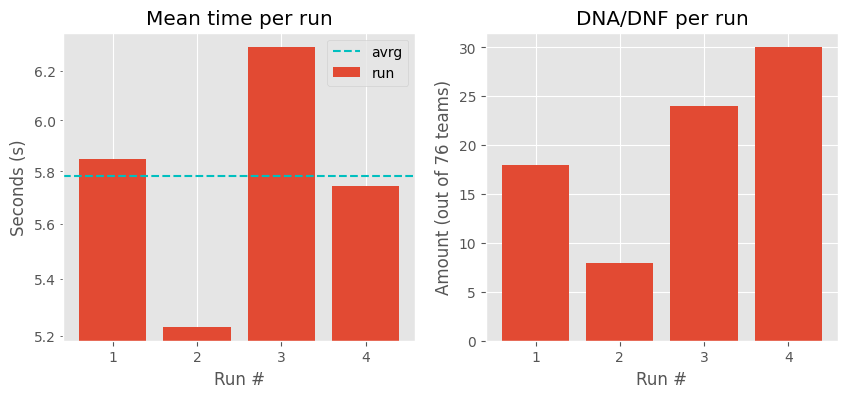

In [170]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))


# Plot means from each run
X = range(1,5)
ax1.bar(X, TIMES)
ax1.axhline(np.mean(TIMES), ls="--", color="c")

# Customizing mean plot
ax1.legend(("avrg", "run"))
ax1.set_yscale("log")
ax1.get_yaxis().set_minor_formatter(ticker.ScalarFormatter())
ax1.set_title("Mean time per run")
ax1.set_xlabel("Run #")
ax1.set_ylabel("Seconds (s)")

# Plot DNA/DNF from each run
ax2.bar(X, DNA)

# Customizing DNA/DNF plot
ax2.set_title("DNA/DNF per run")
ax2.set_xlabel("Run #")
ax2.set_ylabel("Amount (out of 76 teams)")

### Skidpad event

Load event data

In [150]:
skdpd_path = "FSAE_2023_results/FSAE_2023_results - Skidpad event results.csv"

with open(skdpd_path) as skdpd_file:
    reader = csv.reader(skdpd_file)
    next(reader) 

    # Load the 4 runs data and store it in np.array
    ls = []
    for entry in reader:
        # Muliple assignment, casting and changing DNA/DNF into 0
        run1, run2, run3, run4 = entry[3:-2]
        run1 = float(run1) if run1 not in ["DNA", "DNF"] else 0
        run2 = float(run2) if run2 not in ["DNA", "DNF"] else 0
        run3 = float(run3) if run3 not in ["DNA", "DNF"] else 0
        run4 = float(run4) if run4 not in ["DNA", "DNF"] else 0

        arr_entry = np.array((run1, run2, run3, run4),
                           dtype=[("run1", "float64"),
                                  ("run2", "float64"),
                                  ("run3", "float64"),
                                  ("run4", "float64")])
        ls.append(arr_entry)

    skdpd_arr = np.array(ls)

Computing mean and DNA/DNF amount per run

In [160]:
# Counting DNA/DNF per run
DNA = np.zeros(4)

for i in range(4):
    DNA[i] = len(skdpd_arr[f"run{i+1}"][skdpd_arr[f"run{i+1}"] == 0])

# Computing mean per run
MEANS = np.zeros(4)
for i in range(4):
    MEANS[i] = np.mean(skdpd_arr[f"run{i+1}"][skdpd_arr[f"run{i+1}"] != 0])

array([6.00540909, 5.73893421, 5.8241    , 5.8355    ])

Plotting means and DNA/DNF per run

Text(0.5, 0, 'Run #')

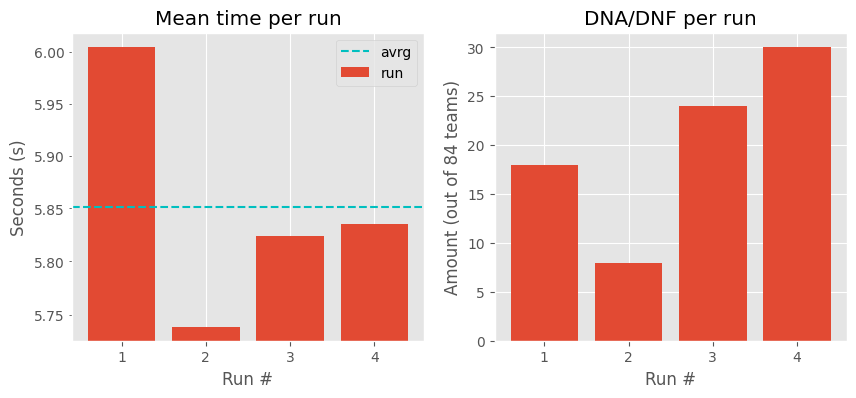

In [173]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
X = range(1,5)

# Means per run
ax1.bar(X, MEANS)
ax1.axhline(np.mean(MEANS), ls="--", color="c")

# Styling mean plot
ax1.legend(("avrg", "run"))
ax1.set_title("Mean time per run")
ax1.set_ylabel("Seconds (s)")
ax1.set_xlabel("Run #")
ax1.set_yscale("log")
ax1.get_yaxis().set_minor_formatter(ticker.ScalarFormatter())

# DNA/DNF per run
ax2.bar(X, DNA)

# Styling Dna plot
ax2.set_title("DNA/DNF per run")
ax2.set_ylabel("Amount (out of 84 teams)")
ax2.set_xlabel("Run #")